### Importing Libraries

In [763]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [764]:
import pandas as pd                                                   # Importing Querying Language
import numpy as np                                                    # Importing Numerical Python for calculations

                                                                      # For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

                                                                      # To Scale our data
from sklearn.preprocessing import scale

                                                                      # To perform KMeans clustering 
from sklearn.cluster import KMeans

                                                                      # To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Steps 1-10: Work-Flow of the Problem
From here on, we work on the problemm statement following the steps mentioned below in order.
1. __Loading Data__
    1. Loading data (Country-data.csv)
    2. Loading Data disctionary (data-disctionary.csv)
    
    
2. __Inspecting Data Frame__
    1. 5 Basic Inspections: `head/columns/shape/info/describe`
    6. Checking for duplicates
    
    
3. __Data Pre-Processing__
    1. Outlier Treatment
        1. Visualizing box plots
        2. Removing Outliers
    2. Standardization of data
    
    
4. __Principal Component Analysis__
    1. Performing linear transformations
    2. Choosing the principal components basing on `explained variance`
    3. Visualizing `PC1 Vs PC2` to look at __which feature is explained by which PC__
    4. Transforming data using PC's
    5. Scatter plot of PC's
    
    
5. __K-Means Clustering__
    1. Hopkins test to check whether data makes a sensible cluster or not
    2. Techniques to choose number of clusters
        1. Silhouette Score (higher score gives the choice of cluster)
        2. Elbow Curve (To check the optimal clusters)
    3. Clustering using K-Means
    4. Adding `cluster id's` to the PC data
    5. Visualize Clusters
    6. Alloting Cluster id's to unscaled data
    
    
6. __Analysis of Clusters (With K-Means Clusters)__
    1. Analysis
    2. Re-treatment of Outliers


7. __Hierarchial Clustering__
    1. Performing Hierarchial Cluster using single/complete linkage
    2. Cutting the cluster tree at different points

8. __Hierarchial Cluster Analysis__
    1. Analysis
    2. Re-treatment of outliers 

9. __Comparing analysis from K-Means and Hierarchial Clustering__
    1. Comparing both Clustering techniques and results
    
10. __Concluding Remarks__
    1. Recommendations
    2. Remarks

## Step 1: Loading data
### *1A: Loading `Country-data.csv`*

In [765]:
# Loading our data
df = pd.read_csv("Country-data.csv")
df.set_index('country',inplace = True)

# Copying the data frame to save the original 
df_copy = df.copy()

__Remarks:__
We are setting index as `country` right now for better understanding, 
if we think it is inappropriate to set country as index due to some unique id issues in future
we will reset to integer indexing

### *1B: Loading `data-dictionary.csv` to understand the data* 
Having `data dictionary` at hand makes it easy for us to understand the data.

In [766]:
# For displaying the complete text
pd.set_option('display.max_colwidth', -1)

# Loading data dictionary
df_dict = pd.read_csv('data-dictionary.csv')
# Set Index
df_dict.set_index('Column Name', inplace = True)

# Displaying data dictionary
df_dict

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services. Given as %age of the Total GDP
health,Total health spending as %age of Total GDP
imports,Imports of goods and services. Given as %age of the Total GDP
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


## Step 2: Inspecting dataframe `Lap - 1`
We will inspect dataframe using 5 generic steps:

In [767]:
#2A: Viewing the dataframe 
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [768]:
#2B: Dimensionality of the dataframe
df.shape

(167, 9)

In [769]:
#2C: Data inspection using ` info() ` function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


__Remarks:__ 
1. All data in all columns is available.
2. All columns are numeric in nature.
3. `Data Imputing/deleting rows/columns` is largely not required.
4. Data is about countries and their socio-economic and health investments and such. 

In [770]:
#2D: List of all the columns in the dataset
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [771]:
#2E: Descriptive Statistics of the data
df.describe(percentiles = [0.005,0.01,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.99,0.995])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
0.5%,2.766000,1.844530,1.942800,9.805203,684.530000,-3.388300,44.052000,1.216400,310.680000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000


__*Generic Remarks whether to perform outlier treatment:*__


1. For features/columns with __`health/income/life expectancy/fertility/gdpp`__, __the outliers > 0.95 indicate the countries are performing well in socio-economic/health scenarios__ and can be deleted without having any influence on the final choice of countries to be funded.
2. For features like __`child_mort/inflation`__, __the outliers > 0.95 indicate the countries doing poor and needed some funding for improving their social/health conditions__


3. If we delete outliers basing on point 1, we will loose data that is important in point 2 (countries which might need funding) which is ambiguous.
4. `Ideally, we should not perform any kind of outlier treatment`. But not performing outlier treatment might influence both __`PCA as well as Clustering`__ negatively. 


__Hence, We will do the outlier treatment for now and `later undo it while doing the analysis by allocating cluster id's of the important features nearest to outliers to the respective outliers`__. 

__`We also need to scale/normalize the data before starting to cluster since the magnitudes of each column are in varied ranges`.__

### *2.F: Checking data for duplicates*

In [772]:
# First let us count the number of duplicates
df.duplicated(subset = None, keep = 'first').value_counts()

False    167
dtype: int64

In [773]:
# Doing the similar analysis for country names to see if we can use it as " Unique Row index "
# If the following row count is 167, we will use it.

pd.DataFrame(df.index.duplicated())[0].value_counts()

False    167
Name: 0, dtype: int64

__Remarks:__ 
1. No row in the data set has duplicates as we can see all rows are giving a `false` boolean while checking for duplicates.
2. As well, no country name is duplicated, so we can keep it as an index for time being.

## Step 3: Data Pre-Processing

### *3A: Outlier Treatment*
__3A.a: Visualizing box-plots:__ This will give an idea on the spread of outliers and how do they effect `PCA and Clustering`.

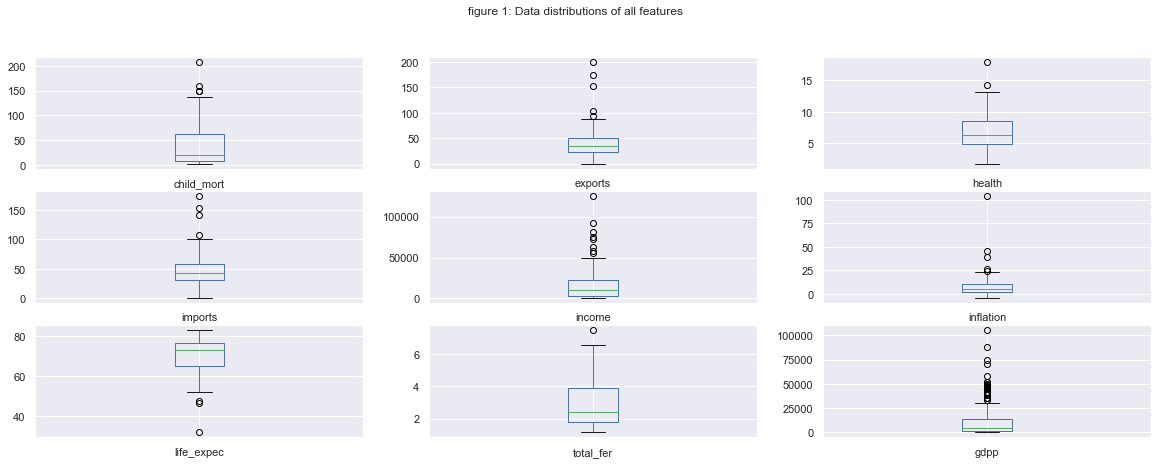

In [774]:
df.plot(kind='box',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
                           title='figure 1: Data distributions of all features')
plt.show() 

__Feature specific remarks on outlier treatment:__

Let us divide the features into 2 categories. 
1. Socio-Economic: Include `income/imports/exports/inflation/gdpp`     
2. Health: Include `child mortality/life expectency/health/total fertility`

The countries with:
1. Less `income/gdpp/life expectancy/health funds`
2. More `inflation/child Mortality` 

are supposed to be `the strong contenders for aids` (Only few strongly correlated features are analyzed here). Let us have a look at how these features are distributed.

1. Outliers are predominant in `income/gdpp/exports/imports in higher percentiles`. This means a few countries are doing exceptionaly well economically. 
2. `Life Expectency` is very good in almost all countries. A few with `40 or less looks like strong contenders for aids`.  
3. In case of `Child Mortality`, outliers on the higher side `> 95%` suggests `compramising health conditions` in which case, the countries might need some aid.

__*Note:*__ Not performing outlier treatment will highly influence our cluster centroids. So let us do it and `allot the nearest cluster id's to the outliers just before start of analysis`. So that, we won't miss any country that possibly is in need of aid.

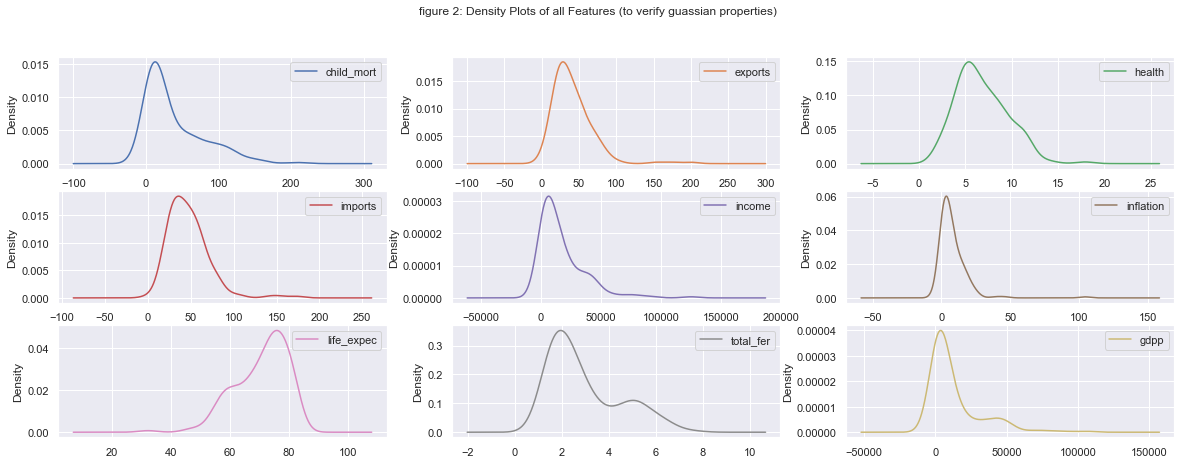

In [775]:
df.plot(kind='density',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
                           title='figure 2: Density Plots of all Features (to verify guassian properties)')
plt.show() 

__Remarks:__ 
1. Largely data is `skewed normal/slightly bi-modal` except `inflation` which is normal.
2. In most features, data is wide spread suggesting a big outlier influence. This is re-emphasizing the facts from box plots.

__3A.b: Removing Outliers:__ Before removing outliers, let us keep in mind that, we should also have sufficient data left for clustering after this step. So, we will study 3 cases choosing different percent outliers and choose one that gives us enough data to cluster.
1. Remove `5%` outliers on both sides and visualize `box plots`
2. Remove `2.5%` outliers on both sides and visualize `box plots`
3. Remove `1.5%` outliers on both sides and visualize `box plots`

In [776]:
# 1.Removing 5% outliers on each of the sides
df_5percent_outlier = df.copy()

for i in df_5percent_outlier.columns:
    Q1 = df_5percent_outlier[i].quantile(0.05)
    Q3 = df_5percent_outlier[i].quantile(0.95)
    df_5percent_outlier = df_5percent_outlier[(df_5percent_outlier[i] >= Q1) & (df_5percent_outlier[i] <= Q3)]
df_5percent_outlier.shape

(62, 9)

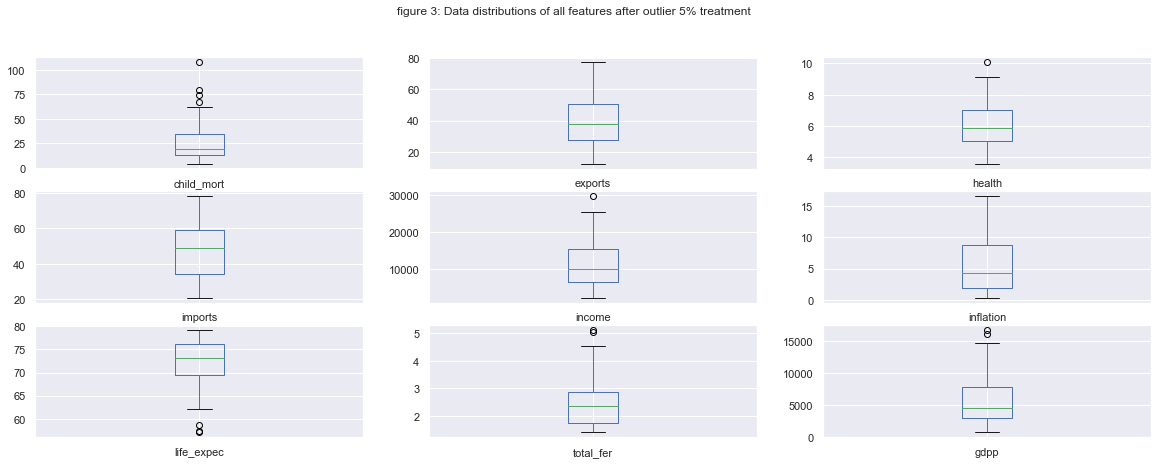

In [777]:
# Visualizing box plots for 5%
df_5percent_outlier.plot(kind='box',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
                           title='figure 3: Data distributions of all features after outlier 5% treatment ')
plt.show() 

*__Remarks:__ Almost all the outliers are treated efficiently by removing `5%` outliers on each side but we loose `2/3rd's of the data`. So, it is not an ideal case to consider.*

In [778]:
## 2.Removing 2.5% outliers on each of the sides
df_2p5percent_outlier = df.copy()

for i in df_2p5percent_outlier.columns:
    Q1 = df_2p5percent_outlier[i].quantile(0.025)
    Q3 = df_2p5percent_outlier[i].quantile(0.975)
    df_2p5percent_outlier = df_2p5percent_outlier[(df_2p5percent_outlier[i] >= Q1) & (df_2p5percent_outlier[i] <= Q3)]
df_2p5percent_outlier.shape

(99, 9)

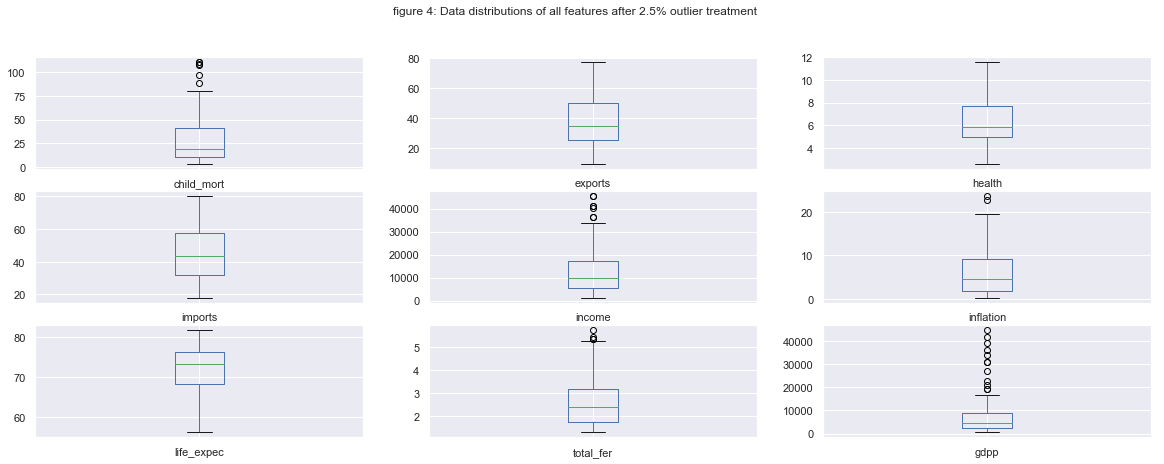

In [779]:
# Visualizing box plots for 2.5%
df_2p5percent_outlier.plot(kind='box',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
                           title='figure 4: Data distributions of all features after 2.5% outlier treatment')
plt.show() 

*__Remarks:__ This case can be considered since we lost only `1/3rd data so far`. But We can still check if we can find a way to remove outliers without loosing so much data.*

In [780]:
# 2.Removing 1.5% outliers on each of the sides
df_1p5percent_outlier = df.copy()

for i in df_1p5percent_outlier.columns:
    Q1 = df_1p5percent_outlier[i].quantile(0.015)
    Q3 = df_1p5percent_outlier[i].quantile(0.985)
    df_1p5percent_outlier = df_1p5percent_outlier[(df_1p5percent_outlier[i] >= Q1) & (df_1p5percent_outlier[i] <= Q3)]
df_1p5percent_outlier.shape

(120, 9)

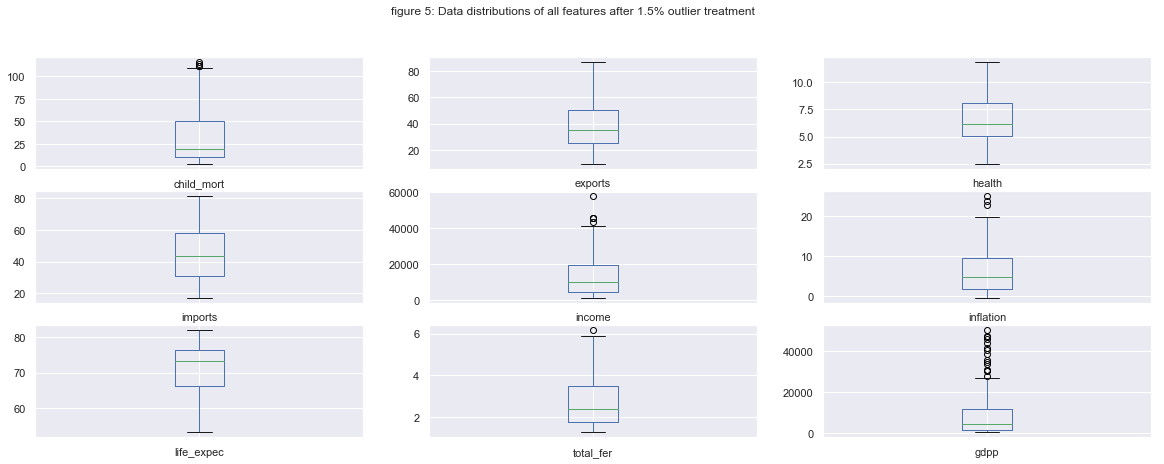

In [781]:
# Visualizing box plots for 1.5%
df_1p5percent_outlier.plot(kind='box',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
                           title='figure 5: Data distributions of all features after 1.5% outlier treatment ')
plt.show() 

*__Remarks:__*
1. *Removing either __`1.5% or 2.5% outliers`__ results in similar box plots.*
2. __`gdpp is the feature`__ that needs further outlier reduction.


3. At any given point, we try to `keep as much data as possible`. So, we will do the following steps.
    1. We shall choose `1.5% outlier treatment` as primary step.
    2. Further, we will reduce outliers only from gdpp and keep the rest of them as it is.

In [782]:
# Outlier Reduction from " gdpp "
Q1 = df_1p5percent_outlier['gdpp'].quantile(0.05)
Q3 = df_1p5percent_outlier['gdpp'].quantile(0.95)
df_1p5percent_outlier = df_1p5percent_outlier[(df_1p5percent_outlier['gdpp'] >= Q1) & (df_1p5percent_outlier['gdpp'] <= Q3)]
df_1p5percent_outlier.shape

(108, 9)

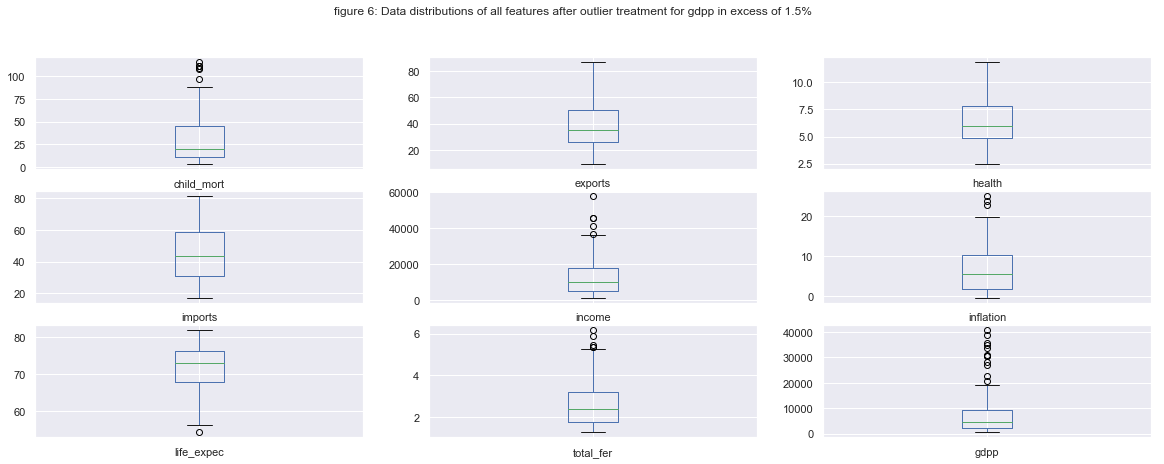

In [783]:
# Visualizing box plots for 1.5%
df_1p5percent_outlier.plot(kind='box',subplots=True,layout=(3,3), sharex=False,figsize = (20,7), 
            title='figure 6: Data distributions of all features after outlier treatment for gdpp in excess of 1.5% ')
plt.show() 

In [784]:
df_1p5percent_outlier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840


__Remarks:__ 
1. This looks just similar to the case where we reduced `2.5% outliers on each side`. But we were able to save `6% data more.`
2. Let us take dataframe __`df_1p5percent_outlier` where we further removed `5% outliers from gdpp`__

### *Step 3B: Standardization of data:*
Having different magnitude ranges for each column might effect the choice of clusters while taking the euclidean distance. Let us look at an hypothetical example to understand the same. `MinMax` scaling is used to explain the situation.
- `Example:` Consider 2 data points with a `0` centroid choosing its cluster.
- `Column-1`: Data point 1's magnitude ranges from -0.1 to 0.1 where our point is at `0.1`
- `Column-2`: Data point 2's magnitude ranges from 0 to 10 where our point is at `1`
- Taking the distance from centroid `0`, considering the other axis the point is 0 in both cases. 
- `Distance of centroid from point 1 is 0.01 where as from point 2 is 1` in which case, point 1 is near that centroid
- After MinMax scaling, distance from point 2 stands at `0.1` while for point 1 stands at `2`, in which case point 2 is near to the centroid than point 1.

__Remarks:__ Typically, We do `Standardization` (converting data to `Z-Score` with 0 mean and unit variance) for scaling while clustering. 

__`Note: The above situation is only hypothetical`__

In [785]:
from sklearn.preprocessing import StandardScaler

# Let us call our standardized dataframe as " df_new "
standard_scaler = StandardScaler()
df_new = standard_scaler.fit_transform(df_1p5percent_outlier)
df_new[0:5]

array([[-0.51775928, -0.60992191,  0.07409708,  0.20519862, -0.31595112,
        -0.42395581,  0.74171914, -0.88564346, -0.44952947],
       [-0.14810487, -0.02408643, -1.0293741 , -0.82223252, -0.05296461,
         1.48512657,  0.77184537,  0.13902498, -0.40996365],
       [-0.73540626,  0.37585894, -0.16699747,  0.82046261,  0.4960308 ,
        -0.92548047,  0.81703473, -0.48899761,  0.41771047],
       [-0.46593856, -1.01550031, -0.92273613,  0.0080752 , -0.60196002,
         0.11538873,  0.28982557, -0.85258964, -0.54256261],
       [ 0.2630061 ,  0.87156588, -0.23654397, -1.46139026,  0.2215331 ,
         1.10692765, -0.34282543, -0.66253017, -0.26239385]])

__Remarks:__ Now that data pre processing is done, let us reduce the dimensions of data by performing `PCA` (Principal Component Analysis).

## Step 4: Principal Component Analysis:

### *4A: Performing Linear Transformations:*
PCA help us reduce these 9 features into lesser number of features by making the combination of features. 

In [786]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(df_new)

#List of PCA components.
PC_array = pca.components_
PC_array

array([[ 4.50701799e-01, -1.39191093e-01, -2.17558899e-01,
        -5.70057033e-02, -3.90148557e-01,  2.03644043e-01,
        -4.44088038e-01,  4.21748958e-01, -3.97666997e-01],
       [-9.33411411e-03,  6.95038206e-01, -2.70832797e-01,
         6.42748836e-01,  3.35363248e-02,  5.41542163e-02,
        -8.64632638e-02, -2.65619486e-02, -1.34608686e-01],
       [ 9.88518094e-02,  1.95314080e-01, -4.19177408e-01,
        -3.91516843e-01,  4.51571892e-01,  5.69363761e-01,
         1.41003103e-02,  1.16179159e-01,  2.85126132e-01],
       [ 3.63237633e-01,  1.33181074e-01,  4.41946103e-01,
         1.28257914e-01,  3.02972170e-01, -2.48189154e-01,
        -2.90827373e-01,  4.31531492e-01,  4.62995455e-01],
       [-1.10922689e-01,  1.67106431e-02,  6.47913462e-01,
         1.59870006e-01, -5.00836766e-02,  7.18153307e-01,
        -5.28011250e-02, -8.17382207e-02, -1.19770599e-01],
       [ 2.93096431e-02,  4.34736239e-01,  1.76046150e-01,
        -4.96492583e-01, -2.53664392e-02, -1.694921

### *4B: Explaining Variance and Choosing Principal Components*
1. Each Principal Component explains certain amount of information (called variance) in the data.
2. The variance explained is in decreasing order with each principal component (PC).
3. PC1 explains more than PC2 and so on. `Variance Explained(PC1>PC2>PC3......)`

In [787]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.42482267, 0.17368805, 0.15785868, 0.10560421, 0.06625595,
       0.02908235, 0.02329885, 0.01341324, 0.005976  ])

##### 4B.a: Scree Plot: Cumulative sum of Variances for each PC to understand how many PC's explained how much variance/information

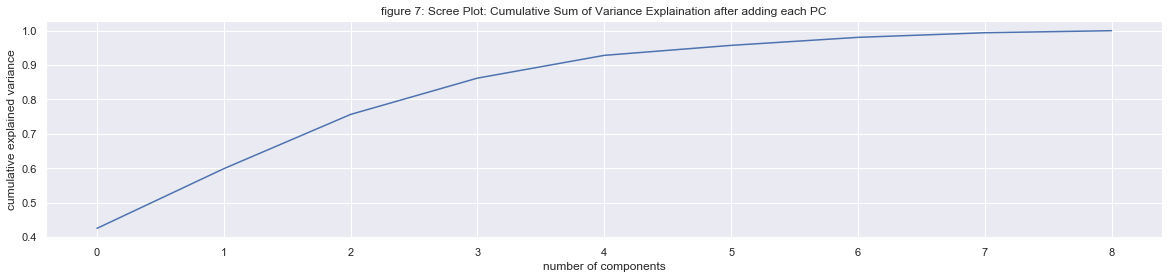

Variance Explained till each PC:


array([0.42482267, 0.59851072, 0.7563694 , 0.86197362, 0.92822956,
       0.95731191, 0.98061076, 0.994024  , 1.        ])

In [788]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (20,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('figure 7: Scree Plot: Cumulative Sum of Variance Explaination after adding each PC')
plt.show()
print('Variance Explained till each PC:')
np.cumsum(pca.explained_variance_ratio_)

__Remarks__ 
1. `5` Principal Components explain 92% of the variance. 
2. Since it is a simple case study and dimensions are largely not a big concern.
3. We will take the maximum allowed PCs. 
4. We can take either 4 or 5. We are taking `5 PC's`.

##### 4B.b: Contributions of `Each Feature for all the 5 Principal Components`  

In [789]:
df_PC = pd.DataFrame({ 'Feature':df.columns,
                       'PC 1': PC_array[0],
                       'PC 2': PC_array[1],
                       'PC 3': PC_array[2],
                       'PC 4': PC_array[3],
                       'PC 5': PC_array[4]})
df_PC.set_index('Feature', inplace = True)

__Remarks:__
1. In `PC 1`, the variance is explained largely by health related features like `child mortality, life expectancy` and so on followed by socio-economic features like `gdpp and income`.
2. In `PC 2`, the variance is explained largely by `imports and exports`.
3. Since, `42% of variance is explained by PC 1`. We can say, `health conditions might contribute alot to deciding aids.` Countries with more health risks might have high chances of getting aid. 
4. PC's only tells `how each feature is contributing to the data`, We need Clustering to seggregates data.

### *4C: Visualizing `PC 1 Vs PC 2`*

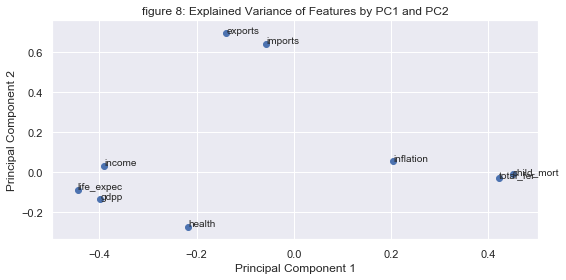

In [790]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.scatter(df_PC['PC 1'], df_PC['PC 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('figure 8: Explained Variance of Features by PC1 and PC2')
for i, txt in enumerate(df_PC.index):
    plt.annotate(txt, (df_PC['PC 1'][i],df_PC['PC 2'][i]))
plt.tight_layout()
plt.show()

__Remarks:__
1. Analysis is exactly same as what we saw in 4B.b while making PC dataframe. To re-iterate:
    1. `PC 1` explains all features `except imports and exports`
    2. `PC 2` explains `imports and exports` well.
    
    
2. __After choosing PC's as 5, Now let us do the dimensionality reduction of data using `incrementalPCA`__.

### *4D: Dimensionality Reduction / Transforming data using PC's*

In [791]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

array_PCA = pca_final.fit_transform(df_new)
array_PCA[0:5]

array([[-0.66343518, -0.32307728, -0.88643089, -1.00583242, -0.08363098],
       [ 0.40871722, -0.19665489,  1.46687763, -1.35564105,  0.26761565],
       [-1.51143984,  0.69279417, -0.48234623, -0.06155352, -0.65328298],
       [ 0.11753405, -0.38718229, -0.31836784, -1.62562845, -0.34974624],
       [ 0.24922688, -0.1247061 ,  1.44550695, -0.59435316,  0.56369144]])

In [792]:
# Converting array into a dataframe
df_PCA = pd.DataFrame(array_PCA, columns = ['PC 1','PC 2', 'PC 3', 'PC 4', 'PC 5'])
df_PCA.set_index(df_1p5percent_outlier.index, inplace = True)
df_PCA.head()


,PC 1,PC 2,PC 3,PC 4,PC 5
country,,,,,
Albania,-0.663435,-0.323077,-0.886431,-1.005832,-0.083631
Algeria,0.408717,-0.196655,1.466878,-1.355641,0.267616
Antigua and Barbuda,-1.511440,0.692794,-0.482346,-0.061554,-0.653283
Armenia,0.117534,-0.387182,-0.318368,-1.625628,-0.349746
Azerbaijan,0.249227,-0.124706,1.445507,-0.594353,0.563691


##### 4D.b Scatter Plot:

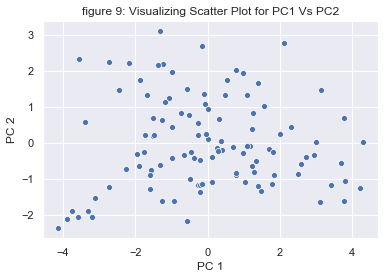

In [793]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC 1',y='PC 2',data=df_PCA)
plt.title('figure 9: Visualizing Scatter Plot for PC1 Vs PC2')
plt.show()

__Remarks:__ By looking at it, we cannot see any kind of patterns in scatter plot above. Let us do do some tests like `hopkins to see whether the data is good for clustering`.


## Step 5: K-Means Clustering

### *5A: Hopkins Test:*
1. K-Means clustering makes clusters even if the data is random. 
2. Before starting with clustering, we do this test to check whether the data can be clustered or not.
3. __`A value > 0.5 suggests that the data can be clustered.`__

In [794]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [795]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(df_PCA)
    hopkin_avg.append(a)
    
np.array(hopkin_avg).mean()

0.6952407658604371

__Remarks:__
`Hopkin test value = 0.6871 > 0.5` which means data can be clustered.

### *5B: Techniques to choose number of clusters*
We cannot randomly choose the number of clusters to be formed. There should be some statistic that determine around how many clusters are appropriate to form. Few such statistics are
1. Silhouette Score
2. Elbow Curve

__Note:__ Sometimes number of clusters taken will be detwerministic due to business constraints.`Example: Number of drivers available to cater in a particular city/area for uber.`
##### 5B.a: Silhouette Score: (Visually)

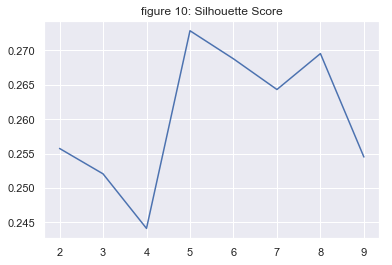

In [796]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 40).fit(df_PCA)
    sse_.append([k, silhouette_score(df_PCA, kmeans.labels_)])

plt.title('figure 10: Silhouette Score')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

##### 5B.b: Elbow Curve (Visually)

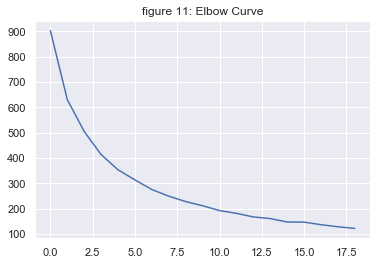

In [797]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state = 40)
    model_clus.fit(df_PCA)
    ssd.append(model_clus.inertia_)

plt.title('figure 11: Elbow Curve')
plt.plot(ssd)
plt.show()

__Remarks:__ Both techniques show that 5 slusters give decent results.

### *5C: Clustering Using K-Means with k = 5*


In [798]:
#Let's perform K means using K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus5.fit(df_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

### *5D: Merging Cluster id's with PC data*

In [799]:
df_Kmean5 =df_PCA.copy()
# df_Kmean5.index = pd.RangeIndex(len(df_Kmean5.index))
df_Kmean5 = pd.concat([df_Kmean5, pd.Series(model_clus5.labels_, index = df_PCA.index)], axis=1)
df_Kmean5.columns = ['PC 1', 'PC 2','PC 3','PC 4','PC 5','Cluster ID']
df_Kmean5.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,Cluster ID
country,,,,,,
Albania,-0.663435,-0.323077,-0.886431,-1.005832,-0.083631,0
Algeria,0.408717,-0.196655,1.466878,-1.355641,0.267616,1
Antigua and Barbuda,-1.511440,0.692794,-0.482346,-0.061554,-0.653283,0
Armenia,0.117534,-0.387182,-0.318368,-1.625628,-0.349746,1
Azerbaijan,0.249227,-0.124706,1.445507,-0.594353,0.563691,1


In [800]:
df_Kmean5['Cluster ID'].value_counts()

0    45
1    29
3    18
2    10
4    6 
Name: Cluster ID, dtype: int64

### *5E: Visualizing Clusters*

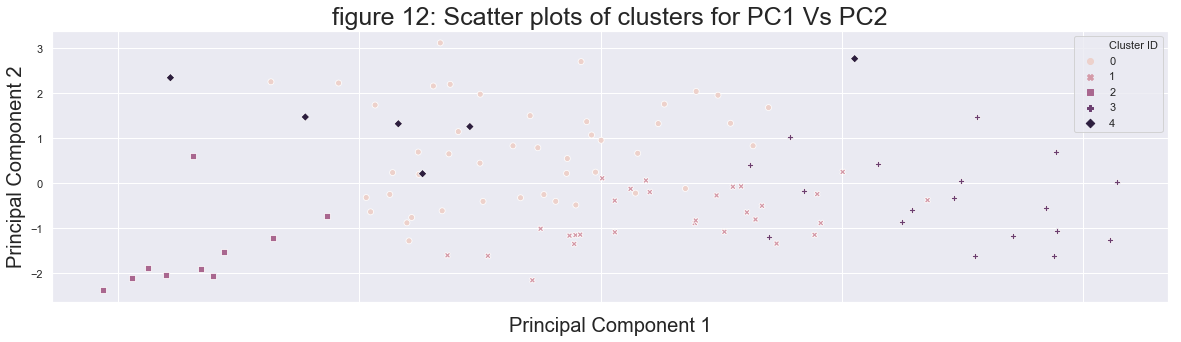

In [801]:
%matplotlib inline
fig = plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
ax=sns.scatterplot(x='PC 1',y='PC 2',hue='Cluster ID',legend='full',data=df_Kmean5, style = "Cluster ID")
plt.title('figure 12: Scatter plots of clusters for PC1 Vs PC2', fontsize = 25)
plt.xlabel('Principal Component 1', fontsize = 20)
plt.ylabel('Principal Component 2', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=50)
plt.show()

### *5F: Assigning Cluster ID's to Un-Scaled data*
1. Principal Components (PC's) are linear combination of original features.
2. Thus we cannot perform any business level analysis using PC's. 
3. It is ideal now to merge this with original unscaled dataframe `df` to get better understanding of the solution
4. Later `drop the PC columns`

In [802]:
# Merging Original and Clustered PC dataframes with country as index
df_with_ids =pd.merge(df,df_Kmean5, left_index=True,right_index=True)
df_with_ids=df_with_ids.drop(['PC 1','PC 2','PC 3','PC 4','PC 5'],axis=1)
df_with_ids.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,1


In [803]:
df_with_ids.shape

(108, 10)

## Step 6: Analysis of K-Means Clustering
### *6A: Analysis:*
Let us see what clusters have to say about independent features and their distribution among clusters. To understand the clusters:
1. Choose any statistical metric on which analysis is performed. We choose `mean for it`
2. Identify the countries that might need aid among the clusters.
3. Assign the `removed outliers (essential ones)` with nearest cluster id's.
4. Analyse the final dataframe

In [804]:
# Mean is computed across features grouping by " Cluster ID "
df_analyze_kMeans = pd.DataFrame([])
df_group_object = df_with_ids.groupby(['Cluster ID'])
for i in df.columns:
    df_analyze_kMeans[i] = df_group_object[i].mean()
df_analyze_kMeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster ID,,,,,,,,,
0,17.895556,47.722222,6.824222,57.493333,11834.000000,4.247467,73.268889,2.154667,6407.022222
1,31.137931,27.971724,5.297241,31.079310,9912.413793,11.222759,71.655172,2.705172,4532.000000
2,5.320000,30.820000,9.350000,34.310000,31640.000000,1.153200,80.150000,1.813000,31850.000000
3,82.094444,28.477778,6.215556,42.027778,3817.222222,7.966944,60.627778,4.605556,1888.000000
4,28.700000,68.983333,4.008333,48.283333,42116.666667,15.306667,73.450000,2.918333,20583.333333


#### On what `basis/features` do we perform analysis?
Previously, while computing Principal Components, we observed `PC 1 explaining 42% of variance`. So let us go back to the `PC 1 trasformation weights (PC 1 in short)` and follow the below steps.
1. Consider features in the order of `PC 1` weights. (Higher the weight, higher the impact of feature)

#### What analysis do we perform?
1. Plot `Bar Charts` to observe how each feature is varying w.r.t clusters.
2. Make some remarks on which might be the `possible cluster for sanction of aids`
3. Do some `bi-variate analysis w.r.t GDPP` for 3 important features that we select above. 

    - We select `GDPP` is a constant variable because, `GDPP` is a key index in weighing a countries economic health.
    - `Economic health` determines the contributuon of a country to various sectorsd like `health and associated funding industry.`
    - The `lower the GDPP`, __`the higher should be child mortality`__ and __`the lower should be income levels` which directly influence the development and hence the much needed funds. 
    
#### 6A.a: Have a look at `PC 1 weights sorted by weightage`
1. We are taking `absolute values of PC 1` weights to see their absolute influence. 
2. Take the `percent influence of each feature on PC 1`
3. Choose the best 3 among them for analysis

In [805]:
# Display df_PC weights for PC 1
df_PC1_sorted = pd.DataFrame(abs(df_PC['PC 1']), index = df_PC.index).sort_values(by = 'PC 1', ascending = False)
percent_PC1 = (df_PC1_sorted/df_PC1_sorted.sum())*100


__Remarks:__ We can see that, as discussed, 
1. `child mortality, life expectancy, income, total fertility, gdpp and income` are __explaining 80% fo variance in PC 1__
2. Let us have a look at how these factors are varying among clusters to choose our `best cluster`

#### 6A.b: Bar Plots to understand Clusters (Uni Variate Analysis w.r.t Clusters)

In [806]:
# Grade (Segmented Univariate Analysis w.r.t Loan Status)
df_temp =df_analyze_kMeans.copy()
df_temp.reset_index(inplace =  True)
df_temp

,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,17.895556,47.722222,6.824222,57.493333,11834.000000,4.247467,73.268889,2.154667,6407.022222
1,1,31.137931,27.971724,5.297241,31.079310,9912.413793,11.222759,71.655172,2.705172,4532.000000
2,2,5.320000,30.820000,9.350000,34.310000,31640.000000,1.153200,80.150000,1.813000,31850.000000
3,3,82.094444,28.477778,6.215556,42.027778,3817.222222,7.966944,60.627778,4.605556,1888.000000
4,4,28.700000,68.983333,4.008333,48.283333,42116.666667,15.306667,73.450000,2.918333,20583.333333


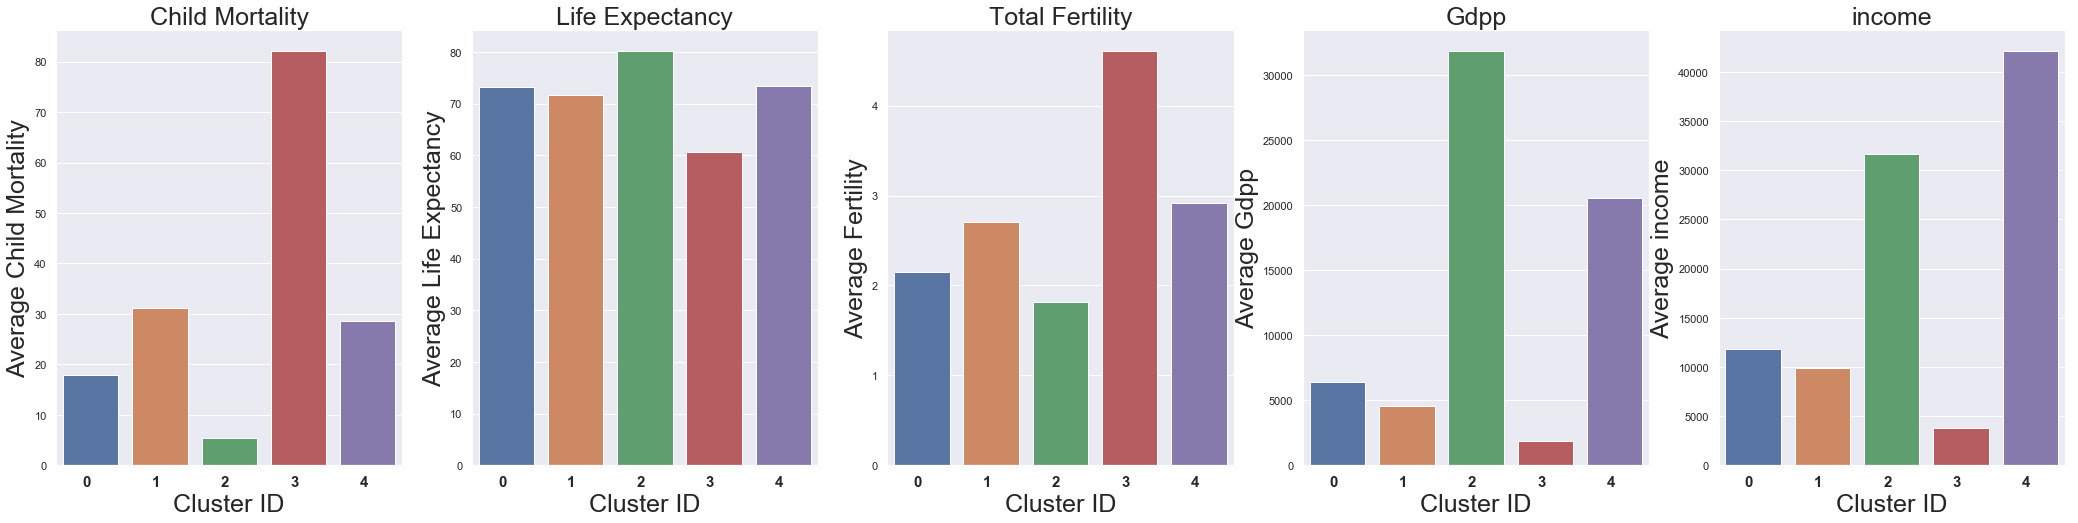

In [807]:
plt.figure(figsize=(36,8))  # Figure Size
plt.title('Bar Plots per Feature w.r.t Cluster ID')
plt.subplot(1, 5, 1)
# 1.Child Mortality
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['child_mort'])
plt.title('Child Mortality',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Child Mortality', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 2.Life Expectancy
plt.subplot(1, 5, 2)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['life_expec'])
plt.title('Life Expectancy',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Life Expectancy', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 3.Total Fertility
plt.subplot(1, 5, 3)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['total_fer'])
plt.title('Total Fertility',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Fertility', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 4.gdpp (Gross Domestic Product PerCapita)
plt.subplot(1, 5, 4)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['gdpp'])
plt.title('Gdpp',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Gdpp', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.subplot(1, 5, 5)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['income'])
plt.title('income',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average income', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)


plt.show()

__Analysis of the Clusters from Bar Plots:__
From the charts, It is evident that:
1. `Life Expectancy` is __stable/approx constant in all clusters. This means we cannot identify the required cluster using this feature.
2. `Total Fertility` is also __not varying much in any of the clusters__
3. Hence the `key features are`:

    1. *Child Mortality:* High for cluster 3 suggesting `poor health care funding`
    2. *Gdpp/Income:* Low for Cluster 3 suggesting `poor . economic growth`

Finally from this uni-variate analysis, it is evident that, `Cluster 3` is definitely the poor economies of countries where there is a dire need for funding.

*__Note:__ __To reiterate, `Child Mortality, Gdpp, Income` determine the analysis__*

#### 6A.c: Bivariate Analysis w.r.t Cluster id's
After eliminating the features like life expectancy and total fertility, we are left with `child mortality and income` to perform bi-variate analysis w.r.t `GDPP`. It is evident that,
1. `Gdpp is directly associated with income` (We might see a direct positive linear relationship)
2. `Child Mortality` (Need some study)

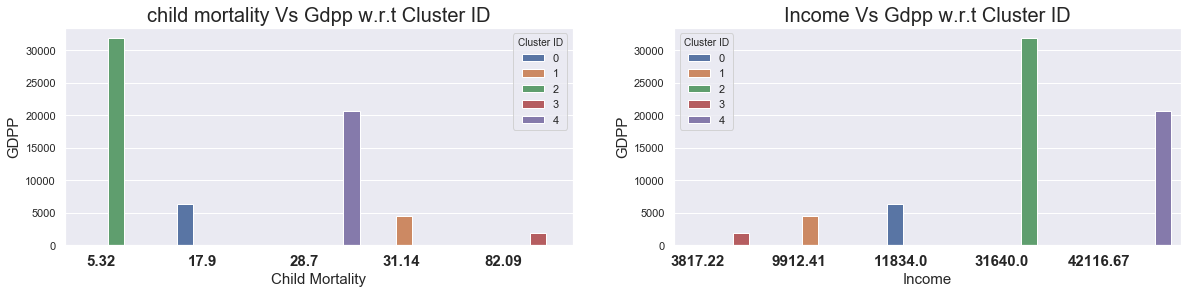

In [808]:
# Count Plot for "Int Rate" Vs "Annual Income"
plt.figure(figsize=(20,4))  # Figure Size

# Child Mortality Vs GDPP
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
ax=sns.barplot(x = round(df_temp['child_mort'],2),y = df_temp['gdpp'], hue = df_temp['Cluster ID'])
plt.title('child mortality Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=15)
plt.xlabel('Child Mortality', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# Income Vs GDPP
plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
ax=sns.barplot(x = round(df_temp['income'],2),y = df_temp['gdpp'], hue = df_temp['Cluster ID'])
plt.title('Income Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=15)
plt.xlabel('Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.show()

__Remarks:__ __This reiterates the above analysis saying that, `Cluster 3 are  the countries needed funding`__ 

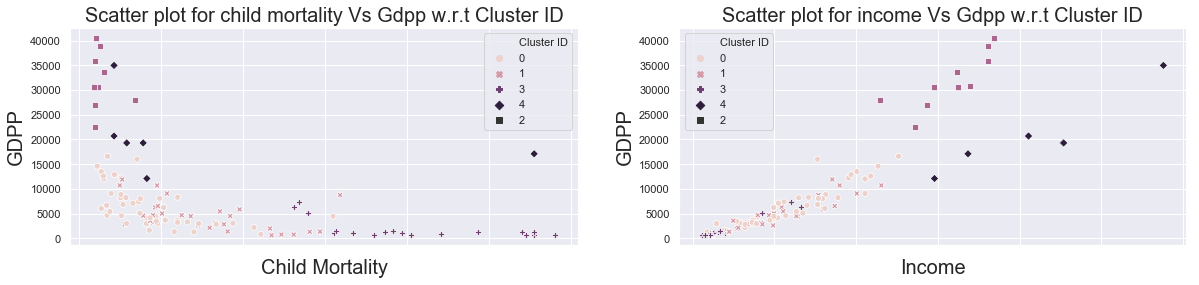

In [809]:
# Count Plot for "Int Rate" Vs "Annual Income"
plt.figure(figsize=(20,4))  # Figure Size
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
ax=sns.scatterplot(x='child_mort',y='gdpp',
                hue = 'Cluster ID',data= df_with_ids,
                style = "Cluster ID")
plt.title('Scatter plot for child mortality Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=20)
plt.xlabel('Child Mortality', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
ax=sns.scatterplot(x='income',y='gdpp',
                hue = 'Cluster ID',data= df_with_ids,
                style = "Cluster ID")
plt.title('Scatter plot for income Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=20)
plt.xlabel('Income', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.show()

__Remarks:__ 
1. `Child Mortality` is more when GDP is less. As GDPP increases, child mortality decreased. (As expected)
2. `Income` and `GDPP` are directly proportiona. One increases while the other increases.

### *6B: Re-treatment of Outliers*
By far, we definitely know, the cluster 3 countries needed funding. 
1. In both cases whether `child mortality` or `income` or `gdpp`, these are at the exteme ends (either low or high)
2. The `outlier treatment we performed earlier will remove some countries which need funding`
3. Our plan is to allocate `Cluster 3` to those countries so that they get their desired funding. 
4. Conditions we apply  to filter those countries are: (Refer `df_analyze_kMeans` for the values)
    1. Child Mortality > 82.09
    2. GDPP < 1888
    3. Income < 3817.22

__Note:__ *`Data Set used for Re-treatment of outlier are original dataset (df).`* Let us make a copy of it before working on it.

In [810]:
# Getting Outliers back to the dataset by assigning clusters
data_temp = df.copy()
data_temp = data_temp[(data_temp['child_mort'] > 82.09) &
                      (data_temp['gdpp'] < 1888) &
                      (data_temp['income'] < 3817.22)]
data_temp['Cluster ID'] = 3
data_temp.shape


(23, 10)

In [811]:
# Check which of the following are not present in the clusters 
list1 = []
for i in data_temp.index:
    if i not in list(df_with_ids.index):
        list1.append(i)
print(list1)   
len(list1)

['Afghanistan', 'Burundi', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Sierra Leone', 'Togo', 'Zambia']


16

__Remarks:__ Let us add the country `pakistan` to the clusteres unscaled data and make a  final clustered data set.

#### Adding Outlier data to the original clustered data

In [812]:
# Identifying duplicates
final_cluster_df_kMeans = pd.concat([df_with_ids, data_temp], axis = 0, join = 'inner')
final_cluster_df_kMeans[final_cluster_df_kMeans.duplicated()]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,3
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,3
Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,3
Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,3
Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,3
Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,3
Mauritania,97.4,50.7,4.41,61.2,3320,18.900,68.2,4.98,1200,3


In [813]:
# Dropping Duplicates
final_cluster_df_kMeans.drop_duplicates(inplace = True)
print(final_cluster_df_kMeans.shape)

(124, 10)


### `Final DataFrame with Cluster ID = 3`

In [814]:
KMeans_Cluster_with_ID_3 = final_cluster_df_kMeans[final_cluster_df_kMeans["Cluster ID"] == 3]
print(KMeans_Cluster_with_ID_3.shape)
KMeans_Cluster_with_ID_3

(34, 10)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,3
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3
Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,3
Ghana,74.7,29.50,5.22,45.9,3060,16.600,62.2,4.27,1310,3
Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,3
Kenya,62.2,20.70,4.75,33.6,2480,2.090,62.8,4.37,967,3


### This is the final `KMeans cluster which needs funding/aid from NGO`. We will compare this cluster with similar cluster in `Hierarchial Cluster`

__Note:__ __`This task is performed in step 9`__

## Step 7: Hierarchial Clustering

### *7A: Single linkage dendrogram*

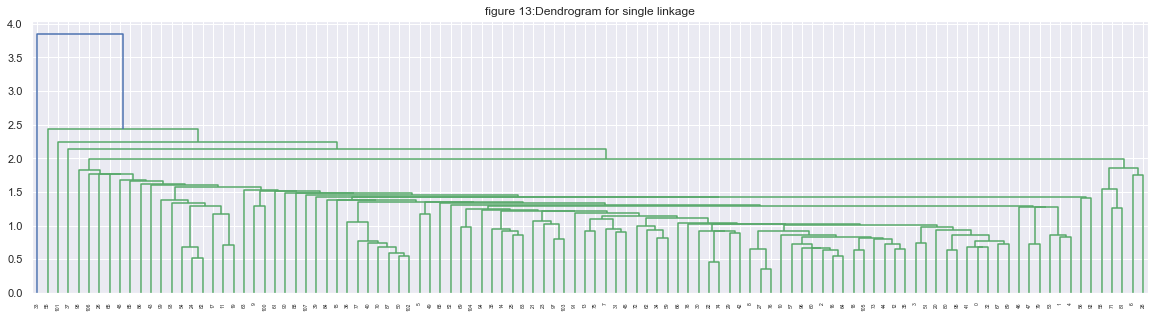

In [815]:
df_dendrogram = df_PCA.copy()
df_single_linkage_merging = linkage(df_dendrogram, method = "single", metric='euclidean')
plt.figure(figsize=(20,5))                               # Figure Size

ax = dendrogram(df_single_linkage_merging) # Plot definition
plt.title("figure 13:Dendrogram for single linkage")   
plt.show()

### *7B: Complete Linkage dendrogram*

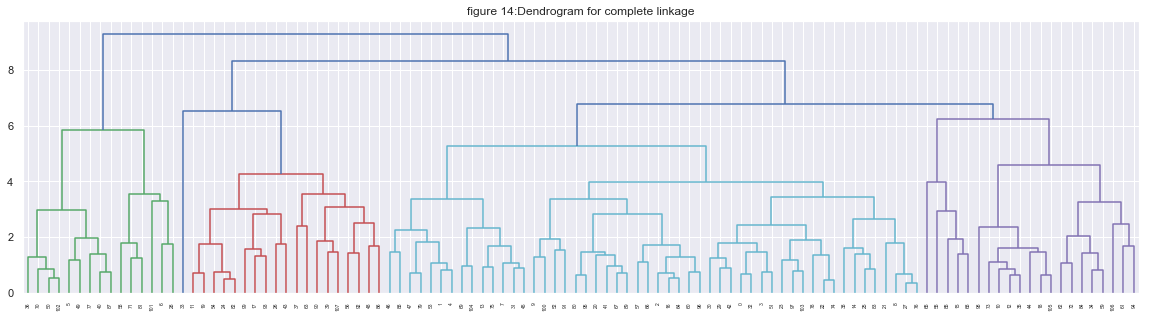

In [816]:
df_complete_linkage_merging = linkage(df_dendrogram, method = "complete", metric='euclidean')

plt.figure(figsize=(20, 5))                               # Figure Size

ax = dendrogram(df_complete_linkage_merging) # Plot definition
plt.title("figure 14:Dendrogram for complete linkage")   
plt.show()

__Remarks:__
1. From the dendrograms in `7A and 7B`, we understand that `Complete Linkage dendrogram` in 7B is `more clear` than single linkage. 
2. Cutting the dendrogram to form clusters is completely our choice.
3. In our case, I am choosing `number of clusters = 4` because we can clearly see 4 major branches in dendrogram.
4. The idea is to analyse how both types of clusters are behaving: `Similar or Dis-similar`

### *7C: Cutting the dendrogram at `number of clusters = 4*

In [817]:
# Cutting the dendrogram, here we cut at n_clusters = 5 same as in K-Means
num_clusters = 4
series_dendrogram4 = pd.Series(cut_tree(df_complete_linkage_merging, n_clusters = num_clusters).reshape(-1,),
                          index = df_PCA.index)


### *7D: Merging `Cluster Id's with PC's (Principal Components)`*

In [818]:
df_dendrogram4 = pd.concat([df_dendrogram, series_dendrogram4], axis=1)
df_dendrogram4.columns = ['PC 1', 'PC 2','PC 3','PC 4','PC 5','Cluster ID']
df_dendrogram4.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,Cluster ID
country,,,,,,
Albania,-0.663435,-0.323077,-0.886431,-1.005832,-0.083631,0
Algeria,0.408717,-0.196655,1.466878,-1.355641,0.267616,0
Antigua and Barbuda,-1.511440,0.692794,-0.482346,-0.061554,-0.653283,0
Armenia,0.117534,-0.387182,-0.318368,-1.625628,-0.349746,0
Azerbaijan,0.249227,-0.124706,1.445507,-0.594353,0.563691,0


### *7E: Visualizing `Clusters from Hierarchial Clustering`*

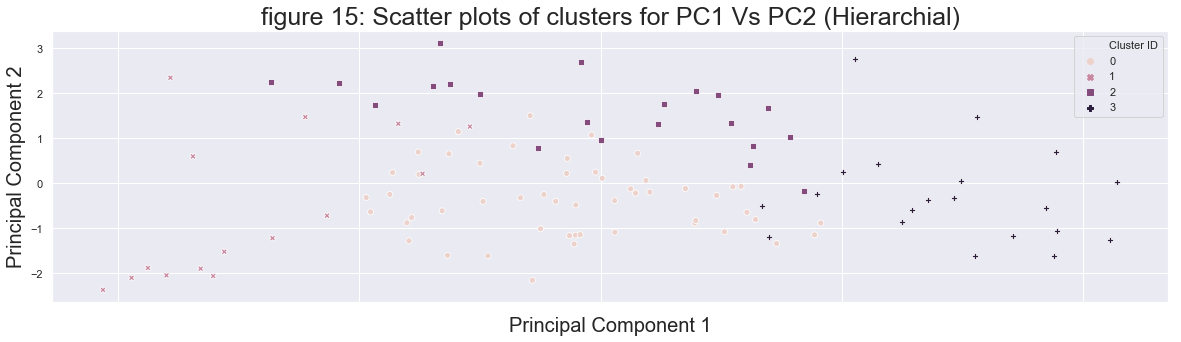

In [819]:
%matplotlib inline
fig = plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
ax=sns.scatterplot(x='PC 1',y='PC 2',hue='Cluster ID',legend='full',data=df_dendrogram4, style = "Cluster ID")
plt.title('figure 15: Scatter plots of clusters for PC1 Vs PC2 (Hierarchial)', fontsize = 25)
plt.xlabel('Principal Component 1', fontsize = 20)
plt.ylabel('Principal Component 2', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=50)
plt.show()

### *7F: Assigning Cluster Id's to Unscaled data* 

In [820]:
# Merging Original and Clustered PC dataframes with country as index
df_with_ids_hierarchial =pd.merge(df,df_dendrogram4, left_index=True,right_index=True)
df_with_ids_hierarchial=df_with_ids_hierarchial.drop(['PC 1','PC 2','PC 3','PC 4','PC 5'],axis=1)
df_with_ids_hierarchial.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0


## Step 8: Analysis of Hierarchial Clustering
### *8A: Analysis:*
The procedure followed for analysis is exactly similar to the Hierarchial Clustering. UNlike KMeans, dendrogram will have all possible clusters formed. We will take the best possible ones.
To re-iterate the steps
1. Choose any statistical metric on which analysis is performed. We choose `mean for it`
2. Identify the countries that might need aid among the clusters.
3. Analyse the data
3. Assign the `removed outliers (essential ones)` with nearest cluster id's.

In [821]:
# Mean is computed across features grouping by " Cluster ID "
df_analyze_Hierarchial = pd.DataFrame([])
df_group_object = df_with_ids_hierarchial.groupby(['Cluster ID'])
for i in df.columns:
    df_analyze_Hierarchial[i] = df_group_object[i].mean()
df_analyze_Hierarchial

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster ID,,,,,,,,,
0,20.657692,32.624615,6.270192,41.040385,11450.576923,7.011942,73.586538,2.222692,5827.884615
1,7.626667,42.420000,7.538000,38.260000,35693.333333,5.231467,78.753333,2.028667,28326.666667
2,28.380952,58.328571,6.570000,66.680952,10160.000000,4.603571,69.419048,2.539524,5448.857143
3,81.340000,31.785000,5.652500,38.475000,5680.500000,11.180250,62.150000,4.730500,2667.600000


In [822]:
## Number of Countries in each cluster
df_dendrogram4['Cluster ID'].value_counts()

0    52
2    21
3    20
1    15
Name: Cluster ID, dtype: int64

#### Why number of clusters is 4?
Hierarchial Clustering as an added advantage of forming all possible clusters while making the model. `Observing dendrogram suggest that there are 4 major clusters.` Hence we `cut the dendrogram at 4`.

#### On what `basis/features` do we perform analysis?
We use exact same features that we took to analyse in KMeans Clustering. First 5 weighted features from PC 1.
1. We computed the `percentage contribution of each feature for PC 1 earlier.` We will use the same. 

#### What analysis do we perform?
1. Plot `Bar Charts` 
2. Make some remarks `possible cluster for sanction of aids`
3. `bi-variate analysis w.r.t GDPP` 

__Note:__ __*We explained in detail why we do this analysis for KMeans Clusters. Refer to step 6 for the same.*__ 

In [823]:
# Display df_PC weights for PC 1
percent_PC1[0:5] 

,PC 1
Feature,
child_mort,16.559240
life_expec,16.316244
total_fer,15.495484
gdpp,14.610688
income,14.334453


__Remarks:__ We can see that, as discussed, 
1. `child mortality, life expectancy, income, total fertility, gdpp and income` are __explaining 80% fo variance in PC 1__
2. Let us have a look at how these factors are varying among clusters to choose our `best cluster`

#### 8A.b: Bar Plots to understand Clusters (Uni Variate Analysis w.r.t Clusters)

In [824]:
# Grade (Segmented Univariate Analysis w.r.t Loan Status)
df_temp =df_analyze_Hierarchial.copy()
df_temp.reset_index(inplace =  True)
df_temp

,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,20.657692,32.624615,6.270192,41.040385,11450.576923,7.011942,73.586538,2.222692,5827.884615
1,1,7.626667,42.420000,7.538000,38.260000,35693.333333,5.231467,78.753333,2.028667,28326.666667
2,2,28.380952,58.328571,6.570000,66.680952,10160.000000,4.603571,69.419048,2.539524,5448.857143
3,3,81.340000,31.785000,5.652500,38.475000,5680.500000,11.180250,62.150000,4.730500,2667.600000


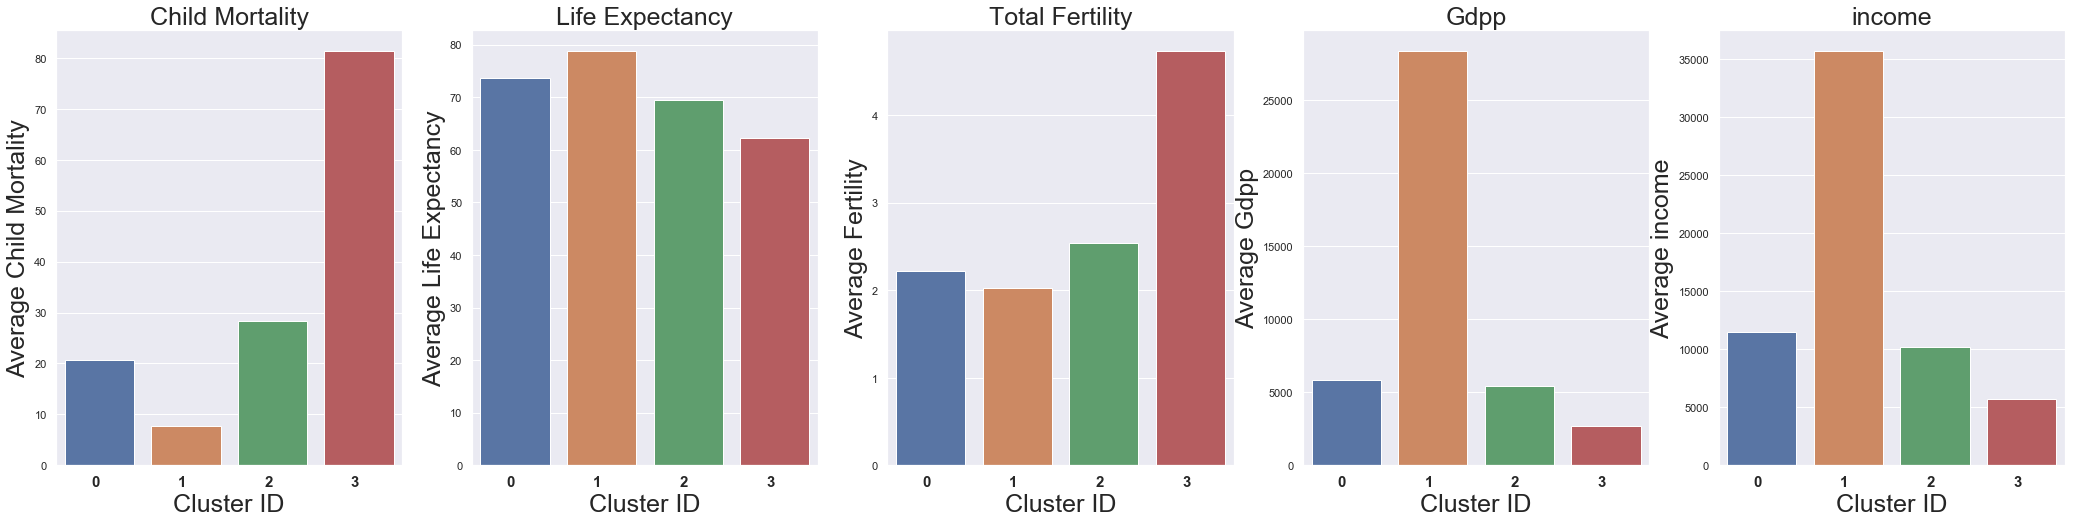

In [825]:
plt.figure(figsize=(36,8))  # Figure Size
plt.title('Bar Plots per Feature w.r.t Cluster ID')
plt.subplot(1, 5, 1)
# 1.Child Mortality
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['child_mort'])
plt.title('Child Mortality',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Child Mortality', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 2.Life Expectancy
plt.subplot(1, 5, 2)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['life_expec'])
plt.title('Life Expectancy',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Life Expectancy', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 3.Total Fertility
plt.subplot(1, 5, 3)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['total_fer'])
plt.title('Total Fertility',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Fertility', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# 4.gdpp (Gross Domestic Product PerCapita)
plt.subplot(1, 5, 4)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['gdpp'])
plt.title('Gdpp',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average Gdpp', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.subplot(1, 5, 5)
sns.set(style="darkgrid")
ax=sns.barplot(x = df_temp['Cluster ID'],y = df_temp['income'])
plt.title('income',   fontsize=25)
plt.xlabel('Cluster ID', fontsize=25)
plt.ylabel('Average income', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)


plt.show()

__Analysis of the Clusters from Bar Plots:__
From the charts, It is evident that:
1. `Life Expectancy` is __stable/approx constant in all clusters. This means we cannot identify the required cluster using this feature.
2. `Total Fertility` is also __not varying much in any of the clusters__
3. Hence the `key features are`:

    1. *Child Mortality:* High for cluster 3 suggesting `poor health care funding`
    2. *Gdpp/Income:* Low for Cluster 3 suggesting `poor economic growth`

Finally from this uni-variate analysis, it is evident that, `Cluster 3` is definitely the poor economies of countries where there is a dire need for funding.

*__Note:__ __To reiterate, `Child Mortality, Gdpp, Income` determine the analysis__*

#### 8A.c: Bivariate Analysis w.r.t Cluster id's
After eliminating the features like life expectancy and total fertility, we are left with `child mortality and income` to perform bi-variate analysis w.r.t `GDPP`. It is evident that,
1. `Gdpp is directly associated with income` (We might see a direct positive linear relationship)
2. `Child Mortality` (Need some study)

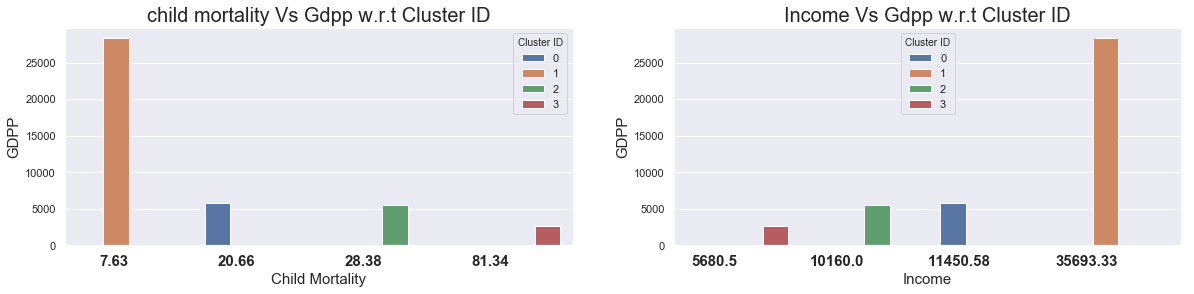

In [826]:
# Count Plot for "Int Rate" Vs "Annual Income"
plt.figure(figsize=(20,4))  # Figure Size

# Child Mortality Vs GDPP
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
ax=sns.barplot(x = round(df_temp['child_mort'],2),y = df_temp['gdpp'], hue = df_temp['Cluster ID'])
plt.title('child mortality Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=15)
plt.xlabel('Child Mortality', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

# Income Vs GDPP
plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
ax=sns.barplot(x = round(df_temp['income'],2),y = df_temp['gdpp'], hue = df_temp['Cluster ID'])
plt.title('Income Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=15)
plt.xlabel('Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.show()

__Remarks:__ __This reiterates the above analysis saying that, `Cluster 3 are  the countries needed funding`__ 

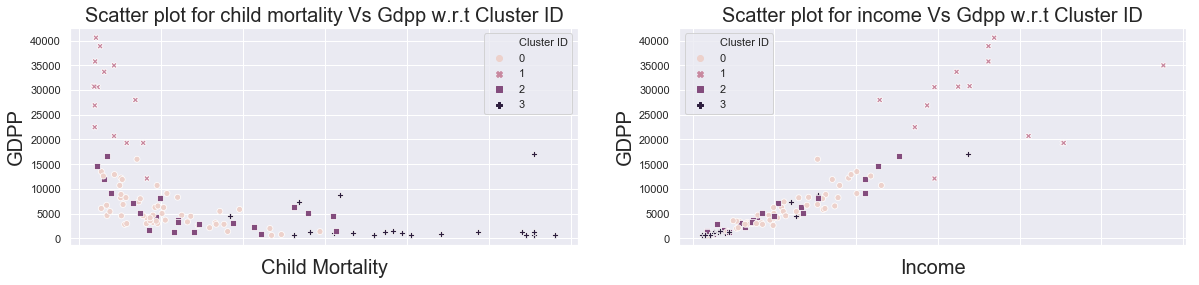

In [827]:
# Count Plot for "Int Rate" Vs "Annual Income"
plt.figure(figsize=(20,4))  # Figure Size
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
ax=sns.scatterplot(x='child_mort',y='gdpp',
                hue = 'Cluster ID',data= df_with_ids_hierarchial,
                style = "Cluster ID")
plt.title('Scatter plot for child mortality Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=20)
plt.xlabel('Child Mortality', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
ax=sns.scatterplot(x='income',y='gdpp',
                hue = 'Cluster ID',data= df_with_ids_hierarchial,
                style = "Cluster ID")
plt.title('Scatter plot for income Vs Gdpp w.r.t Cluster ID', fontsize=20)
plt.ylabel('GDPP', fontsize=20)
plt.xlabel('Income', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), ha="right",weight="bold",fontsize=15)

plt.show()

__Remarks:__ 
1. `Child Mortality` is more when GDP is less. As GDPP increases, child mortality decreased. (As expected)
2. `Income` and `GDPP` are directly proportiona. One increases while the other increases.

### *8B: Re-treatment of Outliers*
By far, we definitely know, the cluster 3 countries needed funding. 
1. In both cases whether `child mortality` or `income` or `gdpp`, these are at the exteme ends (either low or high)
2. The `outlier treatment we performed earlier will remove some countries which need funding`
3. Our plan is to allocate `Cluster 3` to those countries so that they get their desired funding. 
4. Conditions we apply  to filter those countries are: (Refer `df_analyze_kMeans` for the values)
    1. Child Mortality > 82.09
    2. GDPP < 1888
    3. Income < 3817.22

__Note:__ *`Data Set used for Re-treatment of outlier are original dataset (df).`* Let us make a copy of it before working on it.

In [828]:
# Getting Outliers back to the dataset by assigning clusters (Hierarchial Clustering data)
data_temp = df.copy()
data_temp = data_temp[(data_temp['child_mort'] > 81.34) &
                      (data_temp['gdpp'] < 2667) &
                      (data_temp['income'] < 5680)]
data_temp['Cluster ID'] = 3
data_temp.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3


In [829]:
# Check which of the following are not present in the clusters 
list1 = []
for i in data_temp.index:
    if i not in list(df_with_ids_hierarchial.index):
        list1.append(i)
print(list1)   
len(list1)

['Afghanistan', 'Burundi', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Sierra Leone', 'Togo', 'Zambia']


18

__Remarks:__ Let us add the listed countries to the clusteres unscaled data and make a  final clustered data set. <font color = red>Make sure to remove the duplicates </font>

#### Adding Outlier data to the original clustered data

In [830]:
final_cluster_df_Hierarchial = pd.concat([df_with_ids_hierarchial, data_temp], axis = 0)
final_cluster_df_Hierarchial.shape

(133, 10)

In [831]:
# To find the duplicate values
final_cluster_df_Hierarchial = pd.concat([df_with_ids_hierarchial, data_temp], axis = 0, join = 'inner')
final_cluster_df_Hierarchial[final_cluster_df_Hierarchial.duplicated()]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,3
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,3
Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,3
Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,3
Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,3
Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,3
Mauritania,97.4,50.7,4.41,61.2,3320,18.900,68.2,4.98,1200,3


In [832]:
# Dropping Duplicates
final_cluster_df_Hierarchial.drop_duplicates(inplace = True)
print(final_cluster_df_Hierarchial.shape)

(126, 10)


### `Final DataFrame with Cluster ID = 3`

In [833]:
Hierarchial_Cluster_with_ID_3 = final_cluster_df_Hierarchial[final_cluster_df_Hierarchial["Cluster ID"] == 3]
print(Hierarchial_Cluster_with_ID_3.shape)
Hierarchial_Cluster_with_ID_3

(38, 10)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
country,,,,,,,,,,
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3
Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,3
Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,3
Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,3
Ghana,74.7,29.50,5.22,45.9,3060,16.600,62.2,4.27,1310,3
Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,3


## Step 9: Combining and Comparing K-Means and Hierarchial Clustering Results

1. Let us first combine the countries in final clusters (cluster 3) in both cases, to check the differences. 

In [834]:
list_hierarchial = list(Hierarchial_Cluster_with_ID_3.index)
list_KMeans = list(KMeans_Cluster_with_ID_3.index)

# Finding the "common" and "independent" countries in both clusters
# Using "Sets" to perform the operation
list_common_contries = list(set(list_hierarchial)&set(list_KMeans))
list_hierarchial_only = list(set(list_hierarchial) - set(list_common_contries))
list_KMeans_only = list(set(list_KMeans) - set(list_common_contries))

# Finding the length of each list
print("Number of common contries in both clusters: ", len(list_common_contries))
print("Number of contries in only in hierarchial: ", len(list_hierarchial_only))
print("Number of contries in only in KMeans: ", len(list_KMeans_only))


Number of common contries in both clusters:  31
Number of contries in only in hierarchial:  7
Number of contries in only in KMeans:  3


### *9A:  Final dataframe of list of Countries:*
In our case, I want to combine both clusters together to get the final list of the countries. `Totally, 41 countries need our funding/aid`


In [835]:
List_countries_need_aid = list_common_contries + list_hierarchial_only + list_KMeans_only
len(List_countries_need_aid)

41

In [836]:
Final_Countries_df = pd.DataFrame([], index = range(0,len(List_countries_need_aid)))
df_duplicate = df.copy()
df_duplicate.reset_index(inplace = True)

Final_Countries_df = df.loc[List_countries_need_aid]
Final_Countries_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
Kenya,62.2,20.70,4.75,33.6,2480,2.09,62.8,4.37,967
Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


In [837]:
Final_Countries_df.shape

(41, 9)

### *9B: Descriptive Statistics*

In [838]:
Final_Countries_df.describe(percentiles = [0.05,0.1,0.25,0.50,0.75,0.9,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,95.482927,28.532195,6.565610,43.497561,4113.243902,11.720122,58.712195,4.929756,1931.707317
std,34.199868,15.386312,2.506422,18.570346,5982.804003,16.210132,6.683494,1.095325,3119.509915
min,36.900000,8.920000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000
5%,52.500000,11.800000,3.980000,18.900000,764.000000,1.520000,47.500000,3.150000,334.000000
10%,56.000000,13.500000,4.410000,26.500000,888.000000,1.910000,53.100000,3.330000,399.000000
25%,71.900000,17.100000,4.930000,30.900000,1390.000000,3.870000,56.300000,4.270000,553.000000
50%,90.500000,23.800000,5.890000,40.300000,2090.000000,8.920000,58.700000,5.060000,897.000000
75%,111.000000,37.000000,7.910000,51.300000,3370.000000,16.100000,62.800000,5.430000,1310.000000
90%,137.000000,47.800000,11.100000,61.200000,12000.000000,19.600000,66.300000,6.260000,5190.000000


## Step 10: Recommendations
It is impossible to fund 41 countries at one go. So let us make an order of preference for countries in 3 stages
1. Stage 1: Countries with > 0.95 percentile mortality rate and < 0.05 percent gdpp
2. Stage 2: Countries with > 0.75 and < 0.95 percentile mortality rate and < 0.25 and > 0.05 percentile gdpp
3. Stage 3: Rest all countries

#### Stage 1: Countries (> 0.95 Mortality) and (< 0.05 gdpp)

In [839]:
Q1 = Final_Countries_df['gdpp'].quantile(0.05)
Q3 = Final_Countries_df['child_mort'].quantile(0.95)
stage1_countries = Final_Countries_df[(Final_Countries_df['gdpp'] <= Q1) | (Final_Countries_df['child_mort'] >= Q3)]
stage1_countries.shape

(6, 9)

In [840]:
stage1_countries

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662
Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [841]:
list_stage1_countries = stage1_countries.index
list_stage1_countries

Index(['Congo, Dem. Rep.', 'Burundi', 'Haiti', 'Liberia', 'Chad',
       'Sierra Leone'],
      dtype='object', name='country')

#### Stage 2: Countries with `Child Mortality > 0.75 and < 0.95` or `income <0.25 and > 0.05` 

In [842]:
Q1 = Final_Countries_df['gdpp'].quantile(0.05)
Q2 =Final_Countries_df['gdpp'].quantile(0.25)
Q3 = Final_Countries_df['child_mort'].quantile(0.95)
Q4 = Final_Countries_df['child_mort'].quantile(0.75)

stage2_countries = Final_Countries_df[((Final_Countries_df['gdpp'] >= Q1) & (Final_Countries_df['gdpp'] <= Q2)) 
                                      | ((Final_Countries_df['child_mort'] < Q3) & (Final_Countries_df['child_mort'] >= Q4))]
stage2_countries.shape

(15, 9)

In [843]:
stage2_countries

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419
Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
Togo,90.3,40.2,7.65,57.3,1210,1.180,58.7,4.87,488
Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220
Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553


In [844]:
list_stage2_countries = stage2_countries.index
list_stage2_countries

Index(['Congo, Dem. Rep.', 'Mozambique', 'Mali', 'Niger', 'Burkina Faso',
       'Togo', 'Cote d'Ivoire', 'Central African Republic', 'Afghanistan',
       'Malawi', 'Sierra Leone', 'Guinea-Bissau', 'Benin', 'Nigeria',
       'Equatorial Guinea'],
      dtype='object', name='country')

__Note: There are repetitions in the contries from stage 1 to 2 (might be a slight filtering error)__

#### Stage 3 Countries: Rest all

In [845]:
list_stage3_countries = list(set(Final_Countries_df.index) - set(list_stage1_countries) - set(list_stage2_countries))
print(len(list_stage3_countries))
list_stage3_countries

22


['Iraq',
 'Tajikistan',
 'Kenya',
 'Comoros',
 'Lesotho',
 'Lao',
 'Zambia',
 'Mauritania',
 'Tanzania',
 'Sudan',
 'Guinea',
 'Yemen',
 'Botswana',
 'Uganda',
 'Senegal',
 'Kiribati',
 'Pakistan',
 'Cameroon',
 'Namibia',
 'Ghana',
 'Gabon',
 'South Africa']

__Concluding Remarks:__
By far, when we performed the analysis, 
1. We considered `5 PC's` that explained 92% approx variance
2. Took 5 Clusters in KMeans clustering after sillhouette analysis
    1. We got 34 countries from Cluster ID 3 including a few outliers that are important
3. Took 4 clusters for hierarchial clusters 
    1. We got 38 countries with Cluster ID 3. 
4. Common contries in both the clusters are 31
5. We further divided the contries into stages for more appropriate recommendations
    1. In Stage 1: There are 6 contries which need immediate funding. Decisions are taken based on `child mortality` as well as `gdpp`.
    2. In stage 2: There are 13 contries which can be given aids
    3. In stage 3: There are around 22 countries that can be funded.